In [13]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

DATA LOADING

In [14]:
car_df= pd.read_csv(r'C:\Users\user\Downloads\car data.csv')
car_df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


Exploratory Data Analysis (EDA)

In [15]:
car_df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [16]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [17]:
car_df.duplicated().sum()

np.int64(2)

In [18]:
car_data= car_df.drop_duplicates()

In [19]:
car_data.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,299.000000,299.000000,299.000000,299.000000,299.000000
mean,2013.615385,4.589632,7.541037,36916.752508,0.043478
std,2.896868,4.984240,8.566332,39015.170352,0.248720
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.850000,1.200000,15000.000000,0.000000
50%,2014.000000,3.510000,6.100000,32000.000000,0.000000
75%,2016.000000,6.000000,9.840000,48883.500000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


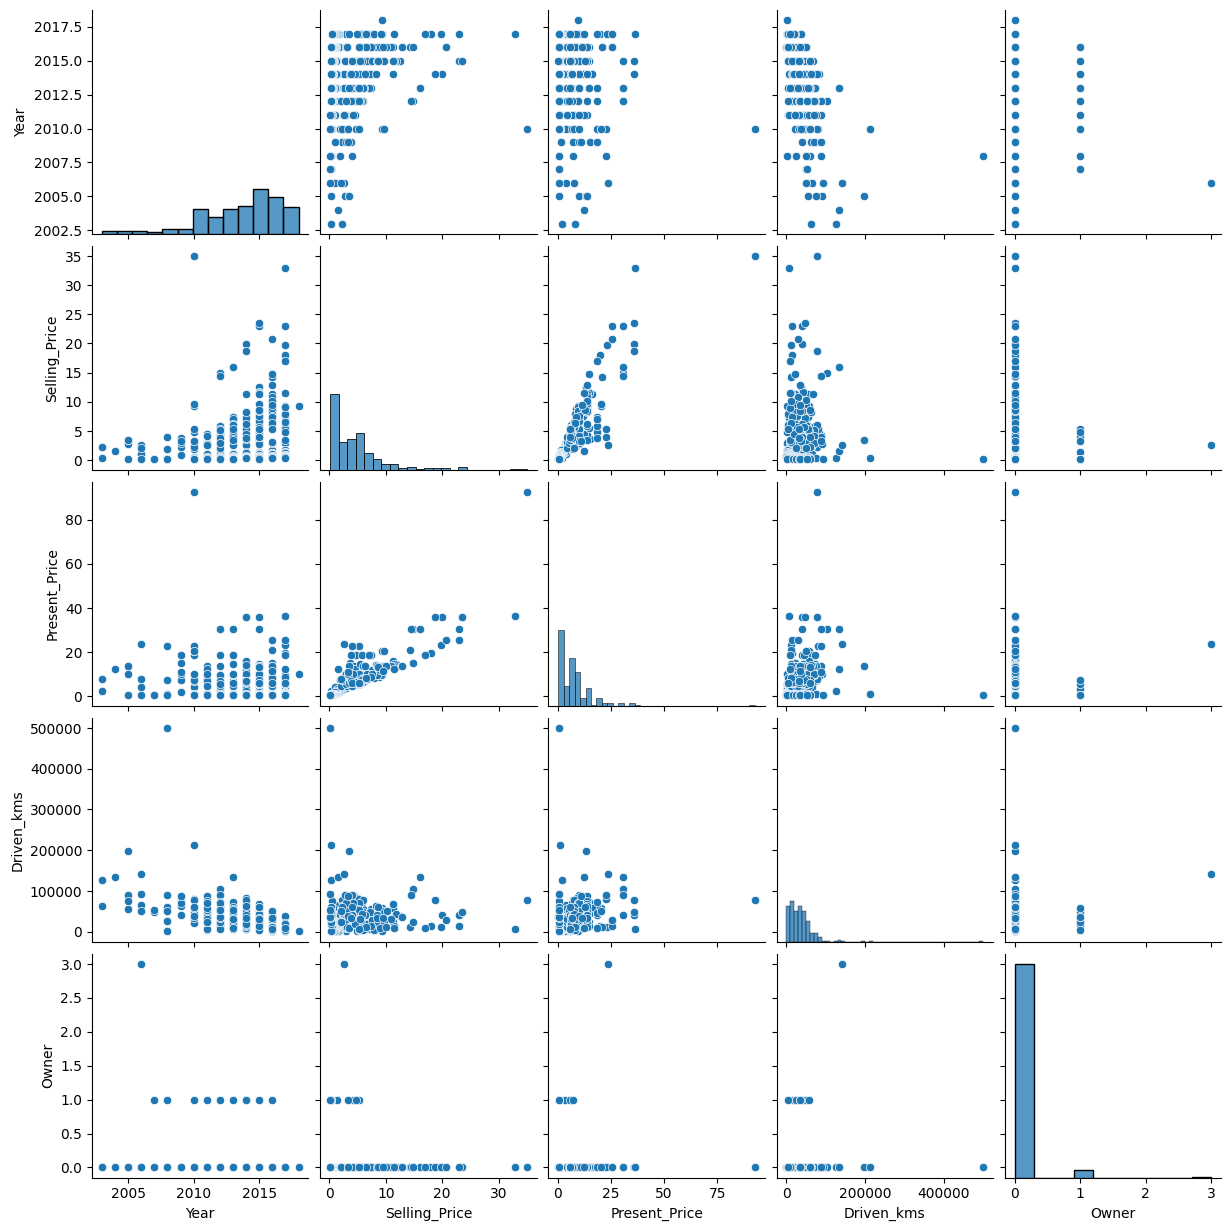

In [21]:
#Check relationship between the features
sns.pairplot(car_data)
plt.show()

DETECTION AND HANDLING OF MISSING VALUES/OUTLIERS

In [20]:
car_df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

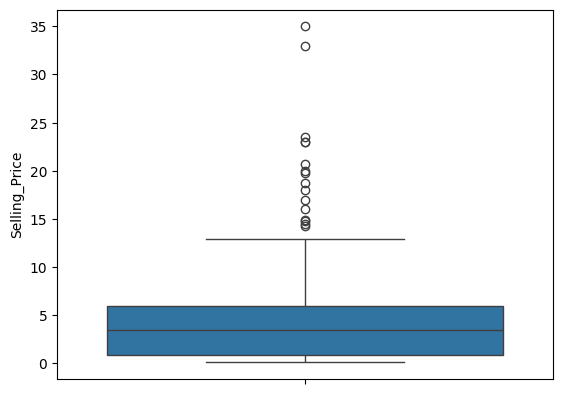

In [22]:
sns.boxplot(car_data['Selling_Price'])
plt.show()

KEY INSIGHTS

There are outliers and their presence suggests that some cars in the data set are sold at unusual price. 

And we need to treat this in order to improve our model performance.

In [23]:
#Use interquartile range(IQR) to deal with outliers
numerical_columns = ['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Owner']
Q1 = car_data[numerical_columns].quantile(0.25)
Q3 = car_data[numerical_columns].quantile(0.75)
IQR = Q3 - Q1
IQR

Year                 4.00
Selling_Price        5.15
Present_Price        8.64
Driven_kms       33883.50
Owner                0.00
dtype: float64

In [24]:
#Find rows with outliers
outlier = (car_data[numerical_columns] < (Q1 - 1.5 * IQR)) | (car_data[numerical_columns] > (Q3 + 1.5 * IQR))
outlier_indices = car_data.index[outlier.any(axis=1)]
print(f"Number of outliers: {len(outlier_indices)}")

Number of outliers: 37


In [25]:
# Remove rows with outliers
car_data_cleaned = car_data.drop(outlier_indices)
#car_data_cleaned
print(f"Dataset size after outlier removal: {car_data_cleaned.shape}")

Dataset size after outlier removal: (262, 9)


CATEGORICAL VALUE COUNT

In [35]:
print(car_data_cleaned.Car_Name.value_counts())

Car_Name
city                      26
verna                     14
corolla altis             12
brio                      10
ciaz                       9
                          ..
Activa 4g                  1
Honda CB Unicorn           1
Hero Honda CBZ extreme     1
Honda Karizma              1
Honda Dream Yuga           1
Name: count, Length: 89, dtype: int64


In [36]:
print(car_data_cleaned.Fuel_Type.value_counts())

Fuel_Type
Petrol    217
Diesel     43
CNG         2
Name: count, dtype: int64


In [38]:
print(car_data_cleaned.Selling_type.value_counts())

Selling_type
Dealer        169
Individual     93
Name: count, dtype: int64


In [39]:
print(car_data_cleaned.Transmission.value_counts())

Transmission
Manual       239
Automatic     23
Name: count, dtype: int64


FEATURE ENGINEERING

In [28]:
#For car age
car_data_cleaned['car_age'] = 2024 - car_data_cleaned['Year']
car_data_cleaned['car_age']

0      10
1      11
2       7
3      13
4      10
       ..
296     8
297     9
298    15
299     7
300     8
Name: car_age, Length: 262, dtype: int64

In [29]:
#For selling price
car_data_cleaned['price'] = car_data_cleaned['Selling_Price'] / car_data_cleaned['Present_Price']
car_data_cleaned['price'] 

0      0.599284
1      0.497904
2      0.736041
3      0.686747
4      0.669578
         ...   
296    0.818966
297    0.677966
298    0.304545
299    0.920000
300    0.898305
Name: price, Length: 262, dtype: float64

In [30]:
#For driven km
car_data_cleaned['price_per_mile'] = car_data_cleaned['Selling_Price'] / car_data_cleaned['Driven_kms']
car_data_cleaned['price_per_mile'] 

0      0.000124
1      0.000110
2      0.001051
3      0.000548
4      0.000108
         ...   
296    0.000280
297    0.000067
298    0.000038
299    0.001278
300    0.000970
Name: price_per_mile, Length: 262, dtype: float64

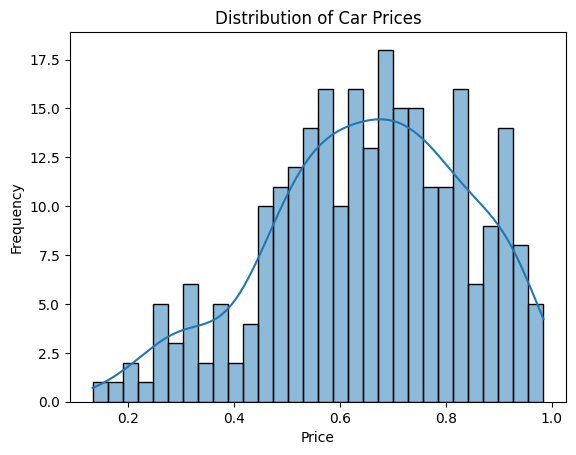

In [31]:
# Distribution of price
sns.histplot(car_data_cleaned['price'], kde=True, bins=30)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency') 
plt.show()

In [32]:
#Encode Categorical Data
data_dummy = car_data_cleaned.copy()
data_dummy['Fuel_Type']= data_dummy['Fuel_Type'].map({'Petrol':0, 'Diesel':1, 'CNG':2})
data_dummy['Selling_type']= data_dummy['Selling_type'].map({'Dealer':0, 'Individual':1})
data_dummy['Transmission']= data_dummy['Transmission'].map({'Manual':0, 'Automatic':1})
data_dummy

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,car_age,price,price_per_mile
0,ritz,2014,3.35,5.59,27000,0,0,0,0,10,0.599284,0.000124
1,sx4,2013,4.75,9.54,43000,1,0,0,0,11,0.497904,0.000110
2,ciaz,2017,7.25,9.85,6900,0,0,0,0,7,0.736041,0.001051
3,wagon r,2011,2.85,4.15,5200,0,0,0,0,13,0.686747,0.000548
4,swift,2014,4.60,6.87,42450,1,0,0,0,10,0.669578,0.000108
...,...,...,...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,0,0,8,0.818966,0.000280
297,brio,2015,4.00,5.90,60000,0,0,0,0,9,0.677966,0.000067
298,city,2009,3.35,11.00,87934,0,0,0,0,15,0.304545,0.000038
299,city,2017,11.50,12.50,9000,1,0,0,0,7,0.920000,0.001278


DECLARING VARIABLES

In [40]:
#Declare inputs(x) and targets(y)
data_preprocessed=data_dummy
inputs= data_preprocessed.drop(['Selling_Price', 'Car_Name'], axis= 1)
inputs

,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,car_age,price,price_per_mile
0,2014,5.59,27000,0,0,0,0,10,0.599284,0.000124
1,2013,9.54,43000,1,0,0,0,11,0.497904,0.000110
2,2017,9.85,6900,0,0,0,0,7,0.736041,0.001051
3,2011,4.15,5200,0,0,0,0,13,0.686747,0.000548
4,2014,6.87,42450,1,0,0,0,10,0.669578,0.000108
...,...,...,...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0,8,0.818966,0.000280
297,2015,5.90,60000,0,0,0,0,9,0.677966,0.000067
298,2009,11.00,87934,0,0,0,0,15,0.304545,0.000038
299,2017,12.50,9000,1,0,0,0,7,0.920000,0.001278


STANDARDIZATION

In [41]:
#STANDARDIZE THE DATA
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X= scaler.fit_transform(inputs)
print(f'Scaled features:{X}')

Scaled features:[[ 0.02989606 -0.10958865 -0.22913961 ... -0.02989606 -0.28537302
  -0.25665129]
 [-0.3823549   0.69441883  0.54361308 ...  0.3823549  -0.83194428
  -0.28972639]
 [ 1.26664894  0.75751815 -1.19991017 ... -1.26664894  0.4519159
   1.99547232]
 ...
 [-2.03135874  0.99159627  2.71379242 ...  2.03135874 -1.87438929
  -0.46560984]
 [ 1.26664894  1.29691557 -1.09848638 ... -1.26664894  1.44368992
   2.54730033]
 [ 0.85439798 -0.04648933 -1.26926473 ... -0.85439798  1.32672686
   1.79924427]]


In [42]:
target= data_preprocessed['Selling_Price']
target

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 262, dtype: float64

SPLIT DATA

In [44]:
#Split data into train and test test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=30) 
print(f"Training set size: {X_train.shape}, Test set size: {X_test.shape}")

Training set size: (209, 10), Test set size: (53, 10)


TRAIN MODEL

In [55]:
# Train the model (RandomForestRegressor)
from sklearn.ensemble import RandomForestRegressor
ranf= RandomForestRegressor(random_state=30)
ranf.fit(X_train, y_train)

RandomForestRegressor(random_state=30)

CROSS VALIDATION OF MODEL

In [56]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(ranf,X,target, cv= 10, scoring = 'neg_mean_squared_error')

#Convert neg_mean_squared_error to positive for easy interpretation
cv_scores= -cv_scores

#Calculate the mean and std of the cv_scores
average_mse= np.mean(cv_scores)
std_mse= np.std(cv_scores)
print(f'MSE Score:{cv_scores}')
print(f'Average MSE:{average_mse}')
print(f'Standard Deviation of MSE: {std_mse}')

MSE Score:[0.11977229 0.32738777 0.41531148 0.06405023 0.02141293 0.01579438
 0.10287699 0.43655833 0.12420643 0.79004115]
Average MSE:0.24174119792450122
Standard Deviation of MSE: 0.23562538627275845


INSIGHT

The RandomForestRegressor has a low standard deviation value of 0.23098... which shows the stability of our model's performance

And the low value of our MSE CV scores across the model performance indicates consistency of our model

In [57]:
# Evaluate the Model
y_hat_rf= ranf.predict(X_test)
y_hat_rf 

array([ 1.155 ,  5.297 ,  4.9894,  4.1285,  4.5765,  4.389 ,  8.1895,
        0.3761,  5.446 ,  0.6544,  3.8945,  3.1965,  3.5105,  9.8738,
        1.1815,  0.5839,  4.7795,  1.049 ,  5.4465,  8.64  ,  8.533 ,
        4.259 , 10.9435,  4.746 ,  3.004 ,  9.3024,  8.434 ,  9.7454,
        9.6708,  0.4236,  6.8316,  8.1869,  0.2912,  0.546 ,  4.063 ,
        0.4927,  0.557 ,  9.5404,  3.6195,  4.327 ,  7.3615,  1.1615,
        0.231 ,  0.5743,  1.577 ,  4.6783,  5.461 ,  5.0267,  7.3591,
        2.675 ,  4.5975, 10.8913,  1.6975])

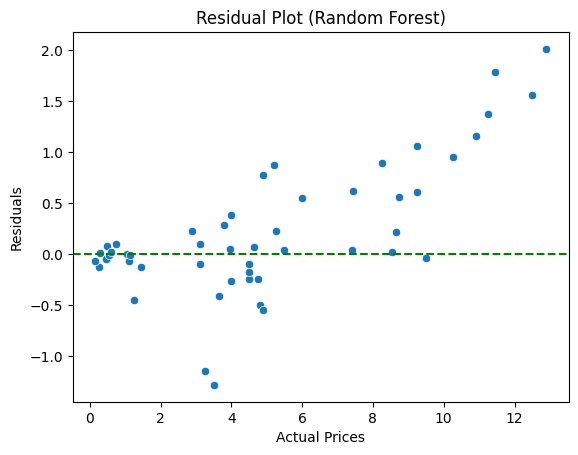

In [58]:
# Residual plot
residuals = y_test - y_hat_rf
sns.scatterplot(x=y_test, y=residuals)
plt.axhline(0, color='green', linestyle='--')
plt.title('Residual Plot (Random Forest)')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.show()

In [59]:
#Check out model performance
from sklearn.metrics import mean_squared_error, r2_score
MSE= mean_squared_error(y_test, y_hat_rf)
R_squared= r2_score(y_test, y_hat_rf) 
print(f"mean_squared_error: {MSE}")
print(f"r2_score: {R_squared}")

mean_squared_error: 0.4330647486792445
r2_score: 0.9670467787443466


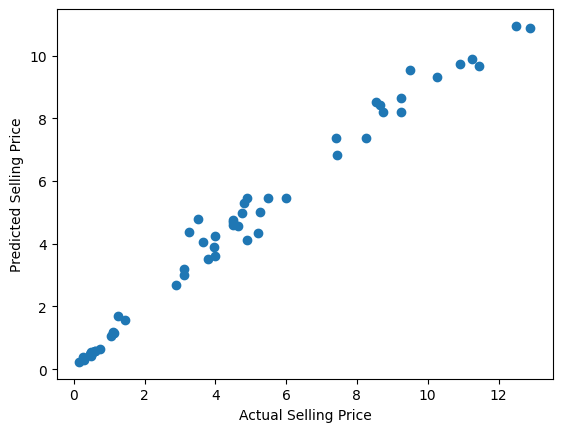

In [60]:
#Create a scatter plot to visualize result
plt.scatter(y_test, y_hat_rf)
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.show()

In [61]:
# Save the trained  model
import joblib
joblib.dump(ranf, 'best_model.pkl')
print("Random Forest model saved as best_model.pkl")

Random Forest model saved as best_model.pkl


Compariing Actual and predicted Price

In [63]:
# Load the saved model
saved_model = joblib.load('best_model.pkl')

# Predict on test data
y_hat_rf = saved_model.predict(X_test)

# Create a DataFrame for comparison
results = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_hat_rf})
print(results.head(10))

     Actual Price  Predicted Price
118          1.10           1.1550
268          4.80           5.2970
1            4.75           4.9894
74           4.90           4.1285
36           4.65           4.5765
293          3.25           4.3890
67           9.25           8.1895
185          0.25           0.3761
27           6.00           5.4460
131          0.75           0.6544
